In [1]:
import json 
import matplotlib.pyplot as plt
import os

from Config import get_data_dir


In [2]:
results_dir = './FindSCs'

results = {}
for file in os.listdir(results_dir):
    with open('{}/{}'.format(results_dir, file)) as f:
        data = json.load(f)
        results[file.split('.')[0]] = data['cf_score']

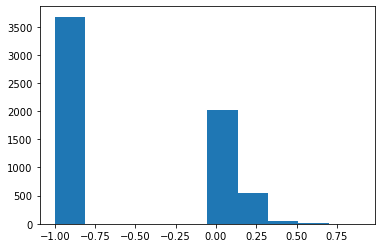

In [3]:
# Raw results

values = [results[key] for key in results]
plt.hist(values)
plt.show()
plt.close()

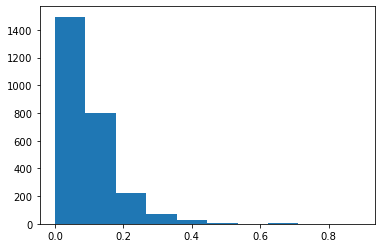

In [4]:
# Drop the pairs that we did not have enough data for

keys = [key for key in results if results[key] != -1]

values = [results[key] for key in keys]
plt.hist(values)
plt.show()
plt.close()

In [5]:
def group(keys):
    m_dict = {}
    s_dict = {}
    for key in keys:
        objs = key.split('-')
        main = objs[0]
        spurious = objs[1]
        
        if main in m_dict:
            m_dict[main].append(key)
        else:
            m_dict[main] = [key]
            
        if spurious in s_dict:
            s_dict[spurious].append(key)
        else:
            s_dict[spurious] = [key]     
    return m_dict, s_dict

29 26 7


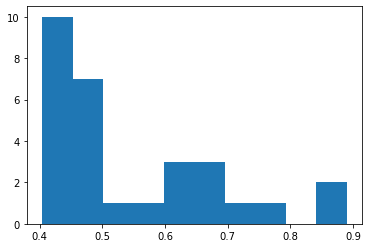

In [6]:
# Filter for a minimum CV Score

keys = [key for key in results if results[key] >= 0.40]

m_dict, s_dict = group(keys)
print(len(keys), len(m_dict), len(s_dict))

values = [results[key] for key in keys]
plt.hist(values)
plt.show()
plt.close()

In [7]:
# What pairs have we identified?
pairs = []
for m in m_dict:
    for pair in m_dict[m]:
        print(pair)
        pairs.append(pair)

# Save
with open('./FindSCs.json', 'w') as f:
    json.dump(pairs, f)

cell+phone-person
handbag-person
bench-elephant
truck-airplane
sandwich-dining+table
dog-sheep
donut-person
tie-cat
tie-person
couch-person
hair+drier-person
hot+dog-person
knife-person
knife-dining+table
tennis+racket-person
fork-dining+table
frisbee-person
frisbee-dog
spoon-dining+table
skateboard-person
baseball+glove-person
baseball+bat-person
bird-sheep
snowboard-person
bowl-dining+table
remote-person
sports+ball-person
skis-person
toothbrush-person


In [8]:
# Find which pairs require us to go and find more data    
for pair in pairs:
    
    with open('{}/val/splits/{}.json'.format(get_data_dir(), pair), 'r') as f:
        splits = json.load(f)
        
    for key in splits:
        if len(splits[key]) < 25:
            print('{}-{}'.format(pair, key))


handbag-person-just_main
bench-elephant-both
truck-airplane-both
dog-sheep-both
tie-cat-both
tie-person-just_main
hair+drier-person-both
hair+drier-person-just_main
hot+dog-person-just_main
tennis+racket-person-just_main
frisbee-person-just_main
frisbee-dog-both
skateboard-person-just_main
baseball+glove-person-just_main
baseball+bat-person-just_main
bird-sheep-both
snowboard-person-just_main
sports+ball-person-just_main
skis-person-just_main
toothbrush-person-both
toothbrush-person-just_main
